# El próposito de este notebook es replicar el ejemplo de cobaya que está en la web.

Es importante que si se desea seguir de manera exacta el ejemplo, se debe revisar la [página de cobaya](https://cobaya.readthedocs.io/en/latest/example.html). 

In [5]:
info = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.2, 0],
            "covs": [[0.1, 0.05],
                     [0.05, 0.2]],
            "derived": True}},
    "params": dict([
        ("a", {
            "prior": {"min": -0.5, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"dist": "norm", "loc": 0, "scale": 1},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": None}}


In [6]:
import sys
for k, v in {"-f": "force", "-r": "resume", "-d": "debug"}.items():
    if k in sys.argv:
        info[v] = True

In [7]:
from cobaya.yaml import yaml_load_file

info_from_yaml = yaml_load_file("../gaussian.yaml")

In [8]:
from cobaya.run import run

updated_info, sampler = run(info)

[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (was 2).
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Initial point:
[prior] Reference values or pdf's for some parameters were not provided. Sampling from the prior instead for those parameters.
[mcmc] 
 weight  minuslogpost         a    b  derived_a  derived_b  minuslogprior  minuslogprior__0       chi2  \
    1.0     20.938953  2.021161  0.0   5.759016  -2.176703       2.171702          2.171702  37.534503   

 chi2__gaussian_mixture  
              37.534503  
[mcmc] Sampling! (NB: nothing will be printed until 40 burn-in samples have been obtained)
[mcmc] Finished burn-in phase: discarded 40 accepted steps.
[mcmc] Checkpoint: 80 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Convergence of means: R-1 = 0.460777 after 80 accepted steps
[mcmc] Updated cova

[root] *WARNING* outlier fraction 0.035526315789473684 
Mean:
[ 0.20938777 -0.00396501]
Covariance matrix:
[[0.09015921 0.03745944]
 [0.03745944 0.16615251]]


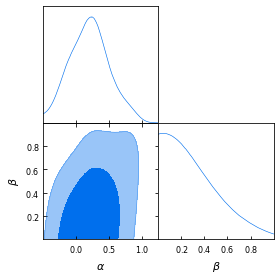

In [12]:
# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info, sampler["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
%matplotlib inline  
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)